# Welcome to Tabular Classification/Regression

## This is the user guide notebook for sampling asset

## According to guide notebooks, find your own arguments.

In [1]:
from wrapping import Wrapper

In [2]:
wrapper = Wrapper(0, exp_plan_file='config/sampling_experimental_plan.yaml')

[2023-11-16 01:44:16,961][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-16 01:44:16,963][PROCESS][INFO]:  << train >> already exists in << /home/jovyan/project/alo_test/tcr/alo/input/ >>. 
 & << get_external_data >> is set as << every >>. 
 Start re-loading external data. << /nas001/users/sujin2.lee/share/techtalk_sampling_1030/train/ >> : pre-existing directory is deleted ! 

[2023-11-16 01:44:17,396][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-16 01:44:17,400][PROCESS][INFO]: Start renewing asset : /home/jovyan/project/alo_test/tcr/alo/assets/input
[2023-11-16 01:44:17,969][PROCESS][INFO]: /home/jovyan/project/alo_test/tcr/alo/assets/input successfully pulled.
[2023-11-16 01:44:17,973][PROCESS][INFO]: Start set

  You can safely remove it manually.
  You can safely remove it manually.


[2023-11-16 01:44:49,956][PROCESS][INFO]: ======================================== Finish dependency installation 



In [3]:
wrapper.run()
data_input = wrapper.data
y_column = wrapper.args['y_column']

[2023-11-16 01:44:49,998][USER][INFO][train_pipeline][input]: >> Load path : ['/home/jovyan/project/alo_test/tcr/alo/input/train/train/']


[2023-11-16 01:44:49,994][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:44:49
- current step      : input
- asset branch.     : tabular_2.0
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])




[2023-11-16 01:44:50,790][USER][INFO][train_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project/alo_test/tcr/alo/input/train/train/train.csv)
[2023-11-16 01:44:50,821][USER][INFO][train_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-16 01:44:50,823][USER][INFO][train_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-16 01:44:50,827][USER][INFO][train_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project/alo_test/tcr/alo/input/train/train/train.csv']


[2023-11-16 01:44:50,834][ASSET][INFO][train_pipeline][input]: 

============================= ASSET FINISH ===========================
- time (UTC)        : 2023-11-16 01:44:50
- current step      : input
- save config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns'])
- save data keys    : dict_keys(['dataframe'])


[2023-11-16 01:44:50,836][PROCESS][INFO]: ==================== Finish pipeline: train_pipeline / step: input


## 불균등 유형 분포를 가진 샘플 데이터를 이용해서 샘플링 asset argument 설정 방법을 학습해봅니다.

### Sample Data 구성

- boltfastening dataset
- 경로: /nas001/users/sujin2.lee/share/techtalk_sampling_1030/train/
- x_columns: 13개 (Count,Converted, Torque,angle_min,angle_mean,angle_median,angle_std,angle_max,torque_min,torque_mean,torque_median,torque_std,torque_max)
- y_column: label
- 총 데이터 수: 10100
- 라벨 별 데이터 수: 

In [4]:
data_input['dataframe'][y_column].value_counts()

OK    10000
NG      100
Name: label, dtype: int64

### Sampling asset 사용법
- sampling asset은 data imbalance를 해결하기 위한 under sampling과 over sampling(TBD) 방법론을 제공합니다.
- sampling asset은 아래와 같은 방식으로 진행됩니다. 
    1. 데이터를 grouping하여 데이터 subgroup을 생성합니다.
        - 데이터의 **라벨**과 **그룹키** 컬럼을 기준으로 데이터를 subgroup으로 나눌 수 있습니다.
        - 하기와 같이 총 네 가지 방법으로 subgroup을 나눈 후 샘플링을 적용할 수 있습니다.
            1. subgroup을 생성하지 않고 전체 데이터에 대해 샘플링 적용하기
            2. **라벨**로 subgroup 생성하기(label subgrouping)
            3. **그룹키**로 subgroup 생성하기(groupkey subgrouping)
            4. **라벨**과 **그룹키** 모두 사용하여 subgroup 생성하기
        - 아래는 **라벨**과 **그룹키** 컬럼 모두 사용하여 subgroup을 나눈 예시입니다.  

<div style='text-align:center'><img src="src/techtalk_sampling.PNG" width="500" height="500"/></div>
        
    2. 각 데이터 subgroup에 sampling 방법론을 적용합니다.

### Sampling asset argument list

argument가 다소 복잡하지만 아래 Exercise를 따라하면 쉽게 설정할 수 있습니다.

|args|explanation|default|example|data type|necessary|
|:---:|:---:|:---:|:---:|:---:|:---:|
|sampling_type|sampling 유형 선택 |none(asset 사용x)|none, under, over(TBD)|str|yes|
|sampling_method|under sampling 방법론 선택|random|random, cluster, negative|str|no|
|label_sampling|label subgrouping 진행 여부|False(기능 사용x)|True, False|boolean|yes(label subgroup 사용 시)|
|ignore_label_class|특정 유형 데이터를 모두 데이터에 포함시켜야 하는 경우 지정|\[\]|OK, NG 등 라벨 명 입력|str|yes(label subgroup 사용 시)|
|negative_target_class|(수정필요)| |(수정필요)|(수정필요)|yes(negative sampling 사용 시)|
|label_sampling_num_type|label subgrouping 사용 시 샘플링 데이터 수를 결정하는 방법을 지정합니다.|ratio|ratio,number,mingroup|str|yes(label subgroup 사용 시)|
|label_sampling_num|label_sampling_num_type에 맞춰서 적합한 인자를 입력합니다|0.8|아래 sampling 데이터 수 지정 참고|float,int,dict|yes(label subgroup 사용 시)|
|sampling_groupkey_columns|그룹키로 지정할 컬럼을 입력합니다.(3개 까지 가능)|\[\]|\[컬럼1, 컬럼2\]|list|yes(groupkey subgroup 사용 시)|
|sampling_num_type|groupkey subgrouping 사용 시 샘플링 데이터 수를 결정하는 방법을 지정합니다.|ratio|ratio,number,mingroup|str|yes(groupkey subgroup 사용 시)|
|sampling_num|sampling_num_type에 맞춰서 적합한 인자를 입력합니다|0.8|아래 sampling 데이터 수 지정 참고|float,int,dict|yes(groupkey subgroup 사용 시)|

#### sampling_method

현재 sampling asset에서 제공하는 방법론은 `random`, `cluster`, `negative`의 세 가지입니다. `random`은 데이터 수가 많아 임의 추출하고 싶은 경우, `cluster`는 input data의 분포에 따라 골고루 추출하고 싶은 경우, `negative`는 binary classification인 경우에 사용이 가능하며 특정 유형의 대표성이 부족한 경우(수정필요) 수행하게 됩니다.

#### sampling 데이터 수 지정 방법

sampling asset에서는 label이나 groupkey에 따라 subgrouping을 할 수 있습니다. 이 때 각 방법에 대해 sampling 데이터 수를 결정하는 방법에 대해 지정하여 데이터 불균등 문제를 좀 더 심도있게 다룰 수 있습니다. 우선 sampling 데이터 수를 결정하는 방법(`sampling_num_type`)을 선택하고 이에 따라 데이터 수나 비율에 해당하는 `sampling_num`를 하단 표에 따라 설정하면 됩니다.

|index|sampling_num_type|sampling_num 예시|설명|range|data type|
|:---:|:---:|:---:|:---:|:---:|:---:|
|1|ratio|0.8|입력한 비율에 맞춰서 데이터 추출|0~1|float|
|2|number|500|입력한 숫자(데이터 수)만큼 데이터 추출|1<|int|
|3|mingroup| |subgroup 중에서 가장 크기가 작은 subgroup 기준으로 샘플링|-|-|
|4|compare|{}|label subgroup있을 때) 유형 별 데이터를 입력한 값으로 비례하게 샘플링| {NG:1, OK:10} |dict|

### Exercise
#### A. 데이터 전체에 sampling 적용하기
- 데이터 subgroup 생성 없이 전체 데이터에 대해 under sampling을 적용합니다.
- 변경해야하는 arguments는 다음과 같습니다.  
|argument|설명|default 값|사용가능 값|
|:---:|:---:|:---:|:---:|
|sampling_type|sampling 유형을 선택합니다. |none(asset 사용x)|none, under, over(TBD)|
|sampling_method|under sampling 방법론을 선택합니다.|random|random, cluster, negative|
|sampling_num_type|샘플링 데이터 수를 결정하는 방법을 지정합니다.|ratio|ratio,number,mingroup|
|sampling_num|sampling_num_type에 맞춰서 적합한 인자를 입력합니다|0.8|아래 sampling 데이터 수 지정 참고|  
- 아래는 subgroup 생성 없이 전체 데이터에 대해 random sampling을 적용하는 예제입니다.
- random sampling은 임의 추출하는 방법이고 아래 예시에서는 데이터 구분없이 0.8 비율로 추출했습니다.
- sampling_args['argument 명'] = '값'을 입력하여 sampling asset의 arguments를 입력합니다.

In [5]:
sampling_args = wrapper.get_args(step=1)
sampling_args['sampling_type'] = 'under'
sampling_args['sampling_method'] = 'random'
sampling_args['sampling_num_type'] = 'ratio'
sampling_args['sampling_num'] = 0.8

In [6]:
sampling_args

{'sampling_type': 'under',
 'sampling_method': 'random',
 'label_sampling': False,
 'ignore_label_class': None,
 'negative_target_class': None,
 'label_sampling_num_type': None,
 'label_sampling_num': None,
 'sampling_groupkey_columns': None,
 'sampling_num_type': 'ratio',
 'sampling_num': 0.8}

- sampling asset을 구동합니다

In [7]:
wrapper.run(args=sampling_args)
data_sampling = wrapper.data

/home/jovyan/conda/envs/tcr_test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-11-16 01:45:02,018][ASSET][INFO][train_pipeline][sampling]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:45:02
- current step      : sampling
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['sampling_type', 'sampling_method', 'label_sampling', 'ignore_label_class', 'negative_target_class', 'label_sampling_num_type', 'label_sampling_num', 'sampling_groupkey_columns', 'sampling_num_type', 'sampling_num'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns'])
- load data ke

/home/jovyan/project/alo_test/tcr/alo/assets/sampling/asset_sampling.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sampled'].loc[sampled_idx] = 1 # 'sampled' == 1일 때 sampling 된 것


#### input data와 sampling 한 후 data shape 비교

- 앞서 설정한 것처럼 80% 데이터가 추출되었습니다.

In [8]:
data_input['dataframe'].shape

(10100, 36)

In [9]:
data_sampling['dataframe'].shape

(8080, 37)

#### 2. label(y_column) 기준으로 데이터 subgroup 나누어 sampling 적용하기
- 라벨 기준으로 subgroup을 생성하여 각 라벨 데이터에 under sampling을 적용할 때 조정해야하는 arguments는 다음과 같습니다.  
|argument|설명|default 값|사용가능 값|
|:---:|:---:|:---:|:---:|
|sampling_type|sampling 유형을 선택합니다. |none(asset 사용x)|none, under, over(TBD)|
|sampling_method|under sampling 방법론을 선택합니다.|random|random, cluster, negative|
|label_sampling|label sampling 진행 여부를 선택합니다.|False(기능 사용x)|True, False|
|ignore_label_class|특정 클래스에 대해 샘플링하지 않을 경우 지정합니다.|-|클래스 명 입력|  
|label_sampling_num_type|샘플링 데이터 수 결정 방법을 지정합니다.|-|ratio,number,compare,mingroup|
|label_sampling_num|label_sampling_num_type의 인자를 입력합니다.|-|위 sampling 수 지정 참고|
- 아래는 NG라벨은 모두 사용하고, OK라벨 데이터에 대해 NG 데이터 수의 10배만큼 추출하는 예제입니다.
- 하기 예제에서는 cluster sampling 기법을 사용하여 입력 데이터 분포를 고려하여 추출합니다. 

In [10]:
data_input['dataframe'].columns

Index(['Unnamed: 0', 'No', 'Time', 'Ch1', 'Ch2', 'Count', 'Fastening Time',
       'Target Torque', 'Converted Torque', 'Speed', 'A1', 'A2', 'Snug Angle',
       'Error', 'Screws', 'Result', 'Troque', 'Angle', 'label', 'sample_type',
       'file_name', 'Label_FILE', 'path', 'angle_min', 'angle_mean',
       'angle_median', 'angle_std', 'angle_max', 'torque_min', 'torque_mean',
       'torque_median', 'torque_std', 'torque_max', 'ng_type', 'encoded_label',
       'groupkey'],
      dtype='object')

In [11]:
sampling_args = wrapper.get_args(step=1)
sampling_args['sampling_type'] = 'under'
sampling_args['sampling_method'] = 'cluster'
sampling_args['label_sampling'] = True
sampling_args['ignore_label_class'] = 'NG'
sampling_args['label_sampling_num_type'] = 'compare'
sampling_args['label_sampling_num'] = {'NG':1,'OK':10}

In [12]:
sampling_args

{'sampling_type': 'under',
 'sampling_method': 'cluster',
 'label_sampling': True,
 'ignore_label_class': 'NG',
 'negative_target_class': None,
 'label_sampling_num_type': 'compare',
 'label_sampling_num': {'NG': 1, 'OK': 10},
 'sampling_groupkey_columns': None,
 'sampling_num_type': 'ratio',
 'sampling_num': 0.8}

- sampling asset을 구동합니다

[2023-11-16 01:45:02,447][ASSET][INFO][train_pipeline][sampling]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:45:02
- current step      : sampling
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['sampling_type', 'sampling_method', 'label_sampling', 'ignore_label_class', 'negative_target_class', 'label_sampling_num_type', 'label_sampling_num', 'sampling_groupkey_columns', 'sampling_num_type', 'sampling_num'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns', 'sampling_type'

/home/jovyan/project/alo_test/tcr/alo/assets/sampling/asset_sampling.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sampled'].loc[sampled_idx] = 1 # 'sampled' == 1일 때 sampling 된 것


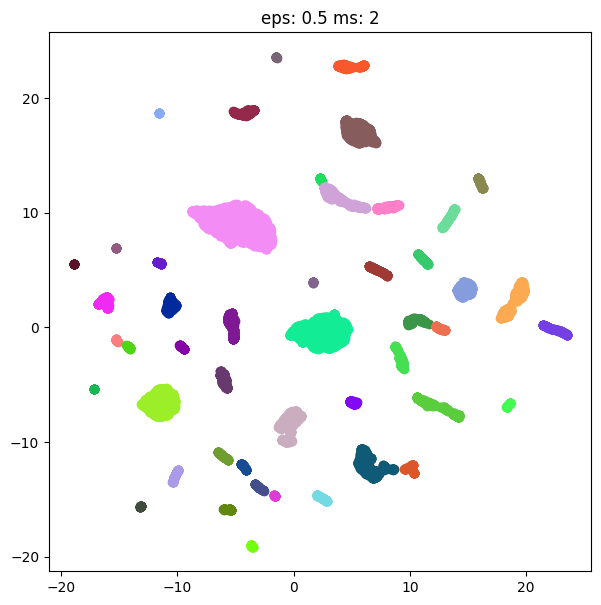

In [13]:
wrapper.run(args=sampling_args, step=1)
data_sampling = wrapper.data

#### input data와 sampling 한 후 data shape 비교

In [14]:
data_input['dataframe'].shape

(10100, 36)

In [15]:
data_sampling['dataframe'].shape

(902, 37)

In [16]:
data_sampling['dataframe'][y_column].value_counts()

OK    820
NG     82
Name: label, dtype: int64

<br>

#### 3. 그룹키 기준으로 데이터 subgroup 나누어 sampling 적용하기
- 그룹키 기준으로 subgroup을 생성하여 각 그룹 데이터에 under sampling을 적용할 때 조정해야하는 arguments는 다음과 같습니다.  
|argument|설명|default 값|사용가능 값|
|:---:|:---:|:---:|:---:|
|sampling_type|sampling 유형을 선택합니다. |none(asset 사용x)|none, under, over(TBD)|
|sampling_method|under sampling 방법론을 선택합니다.|random|random, cluster, negative|
|sampling_groupkey_columns|그룹키로 지정할 컬럼을 입력합니다.(3개 까지 가능)|-|컬럼 명 입력|
|sampling_num_type|샘플링 데이터 수 결정 방법을 지정합니다.|-|ratio,number,compare,mingroup|
|sampling_num|sampling_num_type 인자를 입력합니다.|-|위 sampling 수 지정 참고|
- 아래는 그룹키 컬럼을 기준으로 입력한 데이터 수 만큼 random sampling을 진행하는 예제입니다.
- sampling_args['argument 명'] = '값'을 입력하여 sampling asset의 arguments를 입력합니다.

In [17]:
sampling_args = wrapper.get_args(step=1)
sampling_args['sampling_type'] = 'under'
sampling_args['sampling_method'] = 'random'
sampling_args['sampling_groupkey_columns'] = 'groupkey'
sampling_args['sampling_num_type'] = 'number'
sampling_args['sampling_num'] = 500

In [18]:
sampling_args

{'sampling_type': 'under',
 'sampling_method': 'random',
 'label_sampling': True,
 'ignore_label_class': 'NG',
 'negative_target_class': None,
 'label_sampling_num_type': 'compare',
 'label_sampling_num': {'NG': 1, 'OK': 10},
 'sampling_groupkey_columns': 'groupkey',
 'sampling_num_type': 'number',
 'sampling_num': 500}

- sampling asset을 구동합니다

In [19]:
wrapper.run(args=sampling_args, step=1)
data_sampling = wrapper.data

[2023-11-16 01:45:32,857][ASSET][INFO][train_pipeline][sampling]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:45:32
- current step      : sampling
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['sampling_type', 'sampling_method', 'label_sampling', 'ignore_label_class', 'negative_target_class', 'label_sampling_num_type', 'label_sampling_num', 'sampling_groupkey_columns', 'sampling_num_type', 'sampling_num'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns', 'sampling_type'

/home/jovyan/project/alo_test/tcr/alo/assets/sampling/asset_sampling.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sampled'].loc[sampled_idx] = 1 # 'sampled' == 1일 때 sampling 된 것


#### input data와 sampling 한 후 data shape 비교

In [20]:
data_input['dataframe'].shape

(10100, 36)

In [21]:
data_input['dataframe']['groupkey'].value_counts()

g3    3535
g2    3535
g1    3030
Name: groupkey, dtype: int64

In [22]:
data_sampling['dataframe'].shape

(902, 37)

In [23]:
data_sampling['dataframe']['groupkey'].value_counts()

g3    319
g2    292
g1    291
Name: groupkey, dtype: int64

<br>

#### 4. 라벨과 그룹키 기준으로 데이터 subgroup 나누어 sampling 적용하기
- 라벨과 그룹키 기준으로 subgroup을 생성하여 각 그룹 데이터에 under sampling을 적용할 때 조정해야하는 arguments는 다음과 같습니다.  
|argument|설명|default 값|사용가능 값|
|:---:|:---:|:---:|:---:|
|sampling_type|sampling 유형을 선택합니다. |none(asset 사용x)|none, under, over(TBD)|
|sampling_method|under sampling 방법론을 선택합니다.|random|random, cluster, negative|
|label_sampling|label sampling 진행 여부를 선택합니다.|False(기능 사용x)|True, False|
|ignore_label_class|특정 클래스에 대해 샘플링하지 않을 경우 지정합니다.|-|클래스 명 입력|  
|label_sampling_num_type|샘플링 데이터 수 결정 방법을 지정합니다.|-|ratio,number,compare,mingroup|
|label_sampling_num|label_sampling_num_type의 인자를 입력합니다.|-|위 sampling 수 지정 참고|
|sampling_groupkey_columns|그룹키로 지정할 컬럼을 입력합니다.(3개 까지 가능)|-|컬럼 명 입력|
|sampling_num_type|샘플링 데이터 수 결정 방법을 지정합니다.|-|ratio,number,compare,mingroup|
|sampling_num|sampling_num_type 인자를 입력합니다.|-|위 sampling 수 지정 참고|
- 아래는 다음과 같은 룰이 적용된 random sampling 방법 예제입니다. 
    - NG 데이터는 샘플링 하지 않고 OK데이터는 NG데이터의 2배가 되도록 함
    - OK 데이터의 경우 입력한 그룹키 컬럼 별로 동일하게 샘플링을 진행함
- sampling_args['argument 명'] = '값'을 입력하여 sampling asset의 arguments를 입력합니다.

In [24]:
sampling_args = wrapper.get_args(step=1)
sampling_args['sampling_type'] = 'under'
sampling_args['sampling_method'] = 'random'
sampling_args['label_sampling'] = True
sampling_args['ignore_label_class'] = 'NG'
sampling_args['label_sampling_num_type'] = 'compare'
sampling_args['label_sampling_num'] = {'NG':1,'OK':2}
sampling_args['sampling_groupkey_columns'] = 'groupkey'
sampling_args['sampling_num_type'] = 'mingroup'

In [25]:
sampling_args

{'sampling_type': 'under',
 'sampling_method': 'random',
 'label_sampling': True,
 'ignore_label_class': 'NG',
 'negative_target_class': None,
 'label_sampling_num_type': 'compare',
 'label_sampling_num': {'NG': 1, 'OK': 2},
 'sampling_groupkey_columns': 'groupkey',
 'sampling_num_type': 'mingroup',
 'sampling_num': 500}

- sampling asset을 구동합니다

In [26]:
wrapper.run(args=sampling_args, step=1)
data_sampling = wrapper.data

[2023-11-16 01:45:32,981][ASSET][INFO][train_pipeline][sampling]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:45:32
- current step      : sampling
- asset branch.     : release-1.2
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['sampling_type', 'sampling_method', 'label_sampling', 'ignore_label_class', 'negative_target_class', 'label_sampling_num_type', 'label_sampling_num', 'sampling_groupkey_columns', 'sampling_num_type', 'sampling_num'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns', 'sampling_type'

/home/jovyan/project/alo_test/tcr/alo/assets/sampling/asset_sampling.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sampled'].loc[sampled_idx] = 1 # 'sampled' == 1일 때 sampling 된 것


#### input data와 sampling 한 후 data shape 비교

In [27]:
data_input['dataframe'].shape

(10100, 36)

In [28]:
data_input['dataframe'][[y_column,'groupkey']].value_counts()

label  groupkey
OK     g2          3501
       g3          3500
       g1          2999
NG     g3            35
       g2            34
       g1            31
dtype: int64

In [29]:
data_sampling['dataframe'].shape

(247, 37)

In [30]:
data_sampling['dataframe'][[y_column,'groupkey']].value_counts()

label  groupkey
OK     g1          55
       g2          55
       g3          55
NG     g2          30
       g1          26
       g3          26
dtype: int64

[2023-11-16 01:45:33,869][ASSET][INFO][train_pipeline][train]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/models/train/
[2023-11-16 01:45:33,887][ASSET][INFO][train_pipeline][train]: Successfully got << output path >> for saving your data into csv or jpg file: 
 /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/output/train/ 
 - [NOTE] The names of output file must be fixed as << output.csv, output.jpg >> 
[2023-11-16 01:45:33,890][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-16 01:45:33
- current step      : train
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_pat


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[INFO] 0th-fold RandomForestClassifier_set0 모델을 학습합니다.(1/36)
[INFO] 1th-fold RandomForestClassifier_set0 모델을 학습합니다.(2/36)
[INFO] 2th-fold RandomForestClassifier_set0 모델을 학습합니다.(3/36)
[INFO] 3th-fold RandomForestClassifier_set0 모델을 학습합니다.(4/36)
[INFO] 0th-fold RandomForestClassifier_set1 모델을 학습합니다.(5/36)
[INFO] 1th-fold RandomForestClassifier_set1 모델을 학습합니다.(6/36)
[INFO] 2th-fold RandomForestClassifier_set1 모델을 학습합니다.(7/36)
[INFO] 3th-fold RandomForestClassifier_set1 모델을 학습합니다.(8/36)
[INFO] 0th-fold RandomForestClassifier_set2 모델을 학습합니다.(9/36)
[INFO] 1th-fold RandomForestClassifier_set2 모델을 학습합니다.(10/36)
[INFO] 2th-fold RandomForestClassifier_set2 모델을 학습합니다.(11/36)
[INFO] 3th-fold RandomForestClassifier_set2 모델을 학습합니다.(12/36)
[INFO] 0th-fold LGBMClassifier_set0 모델을 학습합니다.(13/36)
[INFO] 1th-fold LGBMClassifier_set0 모델을 학습합니다.(14/36)
[INFO] 2th-fold LGBMClassifier_set0 모델을 학습합니다.(15/36)
[INFO] 3th-fold LGBMClassifier_set0 모델을 학습합니다.(16/36)
[INFO] 0th-fold LGBMClassifier_set1 모델을 학습합니다.(17

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[INFO] 평가 지표는 ( accuracy ) 를 사용합니다. 
모델 정보 로그를 저장합니다. (저장위치: /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/models/train/model_selection.json)

Top 1 model file is saved: /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/models/train/best_model_top0.pkl
[Score] accuracy: 0.9676
[Hyper-parameters] n_estimators: 500, max_depth: 9, verbose: 0, thread_count: 6, random_state: 1234, allow_writing_files: False, 

Top 2 model file is saved: /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/models/train/best_model_top1.pkl
[Score] accuracy: 0.9595
[Hyper-parameters] n_estimators: 300, max_depth: 7, verbose: 0, thread_count: 6, random_state: 1234, allow_writing_files: False, 

Top 3 model file is saved: /home/jovyan/project/alo_test/tcr/alo/.train_artifacts/models/train/best_model_top2.pkl
[Score] accuracy: 0.9514
[Hyper-parameters] n_estimators: 300, max_depth: 7, n_jobs: 1, num_leaves: 30, verbose: -1, 

Following model is the best: CatBoostClassifier_set2 / accuracy:0.9676


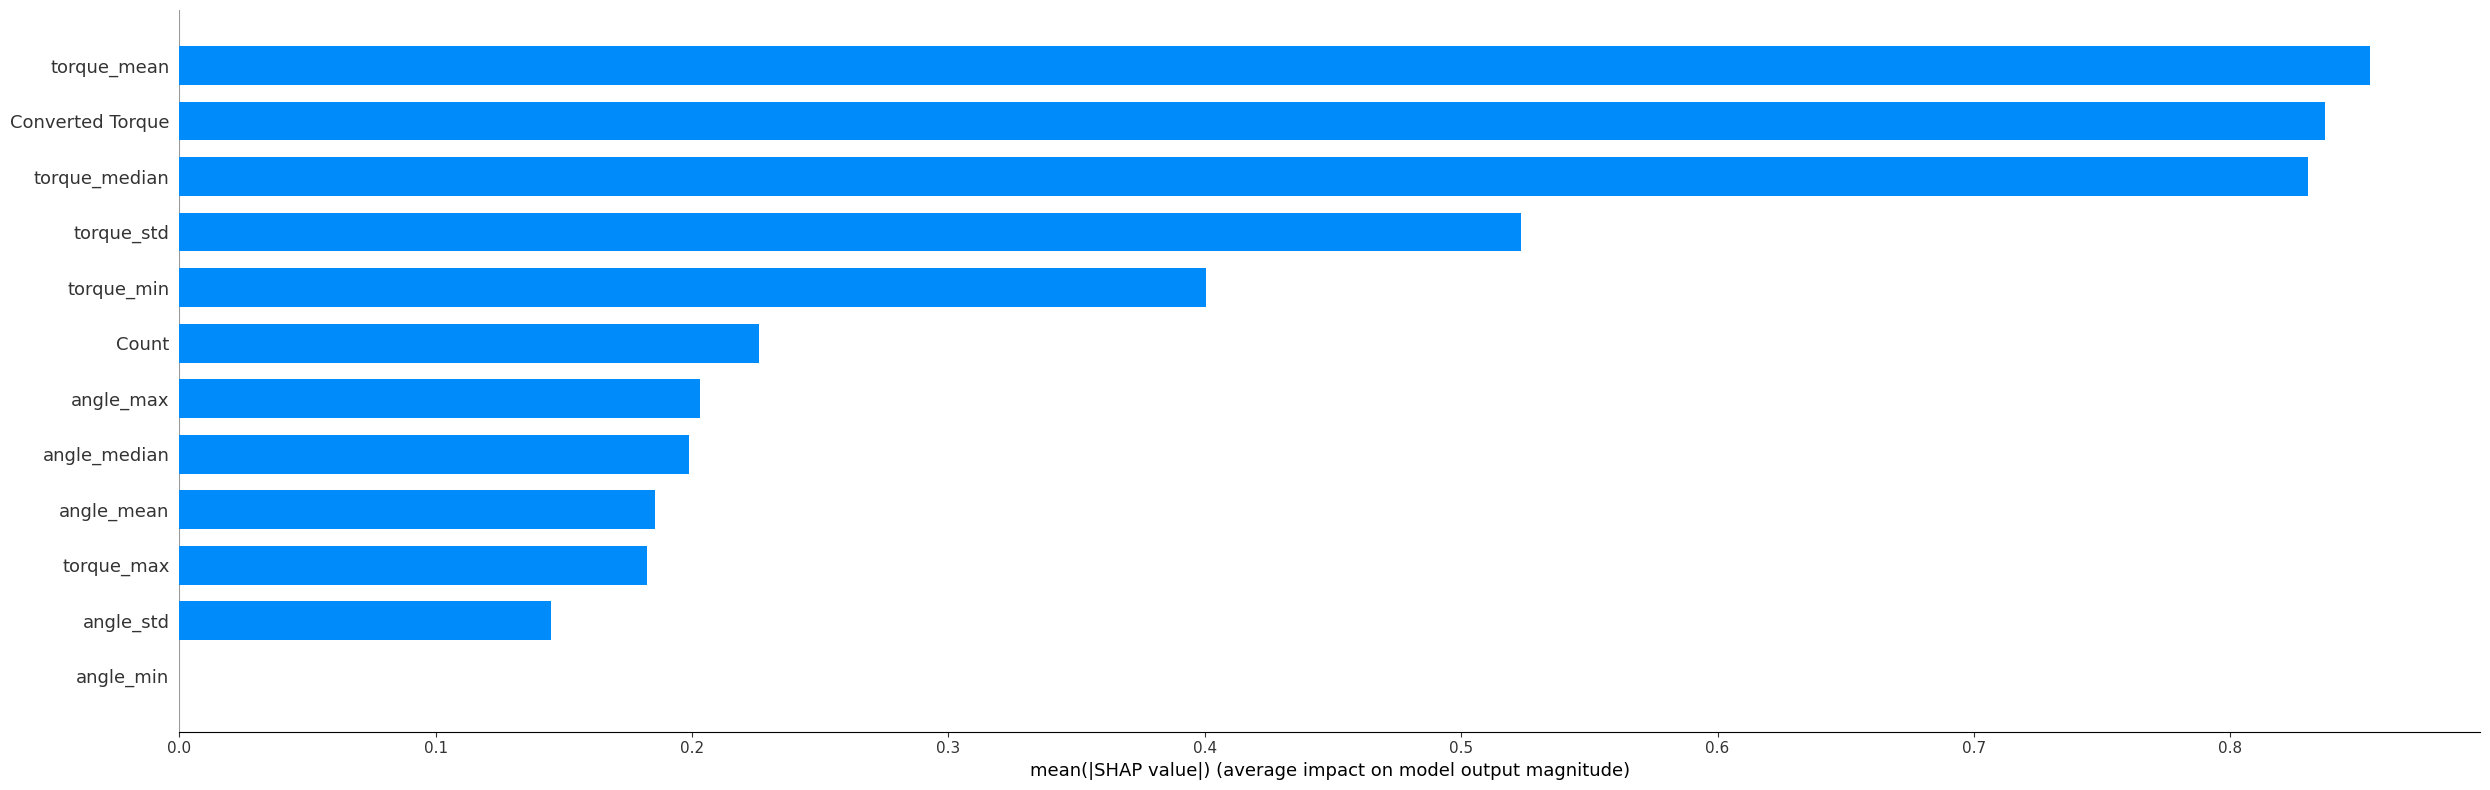

In [33]:
wrapper.run(step=2)

In [35]:
wrapper.data['dataframe']

,Converted Torque,Count,angle_max,angle_mean,angle_median,angle_min,angle_std,torque_max,torque_mean,torque_median,...,torque_min_shapley,torque_std_shapley,label,pred_label,pred_label_best0,pred_label_best1,pred_label_best2,prob_NG,prob_OK,train_test
0,3.92,778.0,5171.0,2629.241645,2632.0,0.0,1575.762474,3.92,0.079357,0.03,...,-0.849533,-1.161644,NG,NG,NG,NG,NG,0.988580,0.011420,3th_test
1,2.81,536.0,4734.0,2549.557836,2835.5,0.0,1489.531701,2.80,0.917351,0.96,...,0.481250,0.176165,OK,OK,OK,OK,OK,0.017197,0.982803,2th_test
2,3.52,395.0,3026.0,1582.093671,1688.0,0.0,969.442990,3.42,0.177139,0.04,...,0.553980,0.703938,OK,OK,OK,OK,OK,0.012690,0.987310,3th_test
3,6.08,503.0,4651.0,2470.242545,2570.0,0.0,1544.355872,6.06,1.083837,0.96,...,-0.064110,0.234920,OK,OK,OK,OK,OK,0.005016,0.994984,3th_test
4,6.02,491.0,4590.0,2414.044807,2498.0,0.0,1519.751635,6.01,1.388452,1.33,...,-0.096381,0.357736,OK,OK,OK,OK,OK,0.005913,0.994087,3th_test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2.80,540.0,4535.0,2484.588889,2725.5,0.0,1440.034405,2.80,1.112611,1.18,...,0.484429,0.327478,OK,OK,OK,OK,OK,0.038177,0.961823,1th_test
243,0.10,80.0,232.0,95.950000,52.0,0.0,94.888342,0.09,0.075000,0.08,...,0.071072,-0.813541,NG,NG,NG,NG,NG,0.990688,0.009312,1th_test
244,3.50,523.0,2331.0,923.292543,690.0,0.0,741.466750,3.47,0.237935,0.09,...,0.402070,0.631497,OK,OK,OK,OK,OK,0.008319,0.991681,1th_test
245,4.01,483.0,2452.0,1042.809524,943.0,0.0,753.785399,3.97,0.403043,0.25,...,0.271620,0.525722,OK,OK,OK,OK,OK,0.007119,0.992881,2th_test
